In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.shape

(7043, 21)

In [12]:
data.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

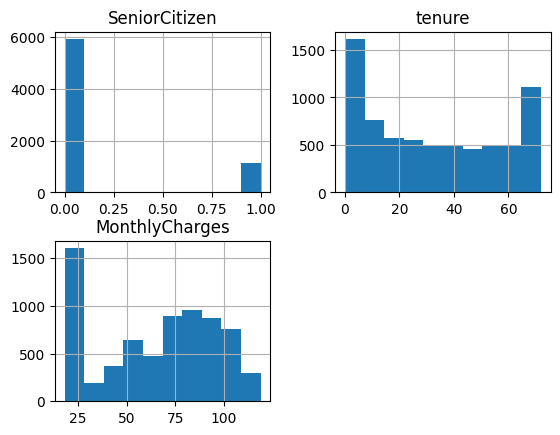

In [18]:
data.hist()
plt.show()

In [23]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

<Axes: xlabel='Churn', ylabel='count'>

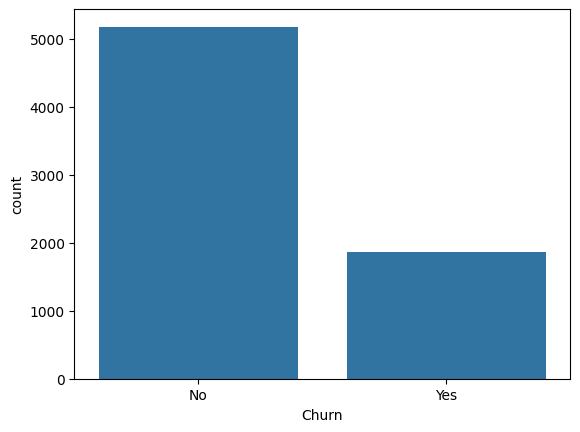

In [31]:
sns.countplot(x='Churn', data=data)

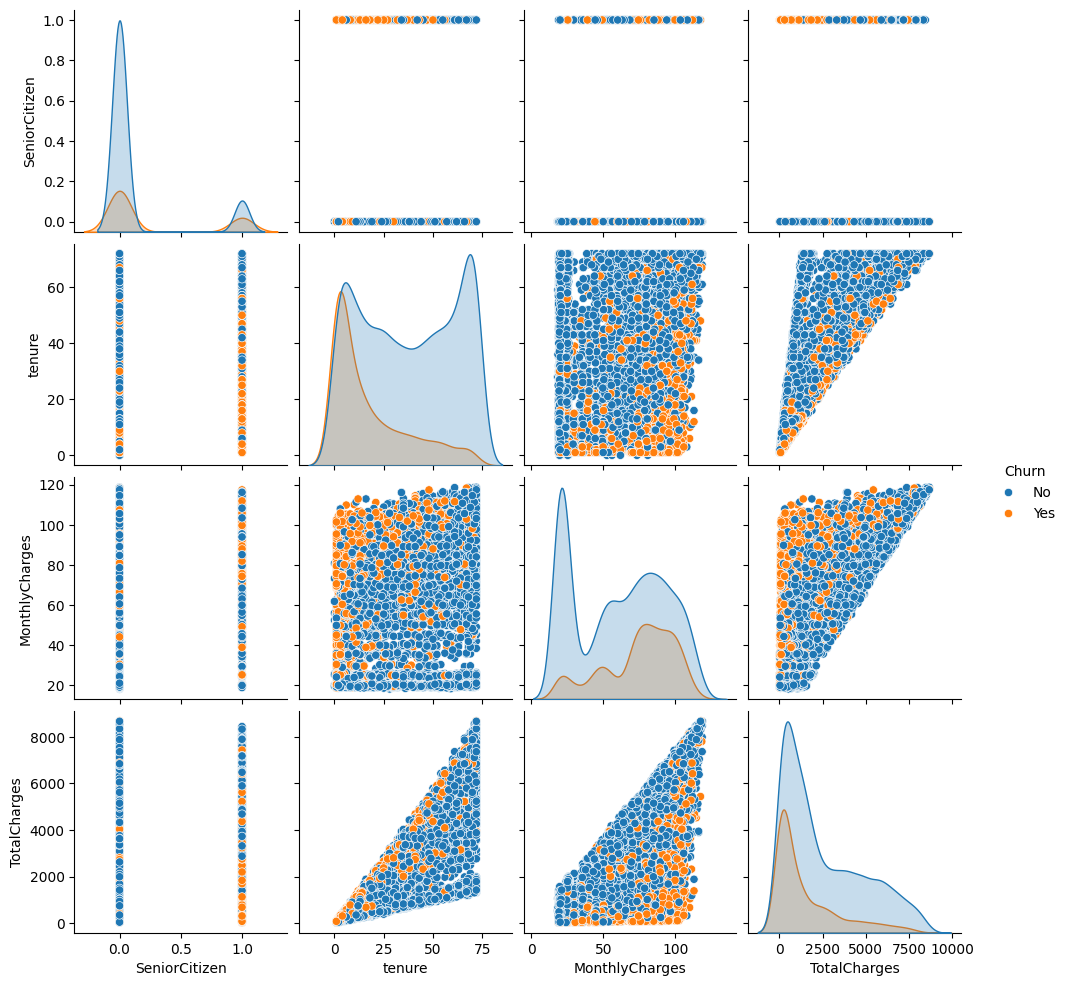

In [35]:
sns.pairplot(data, hue='Churn')

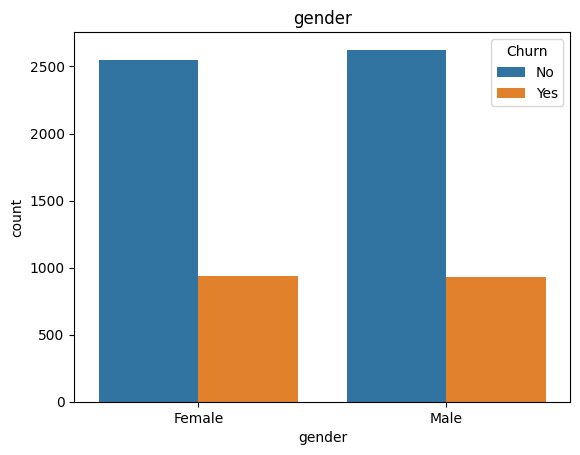

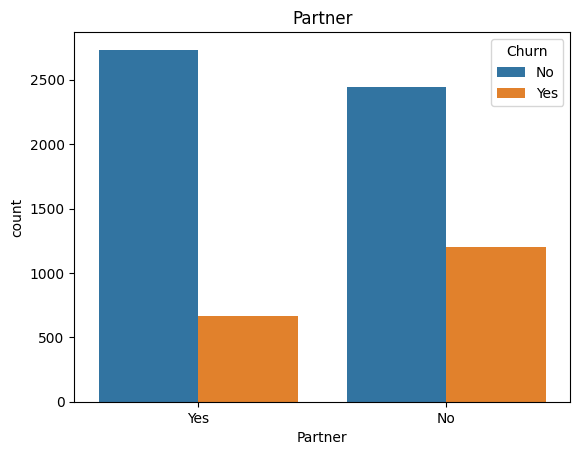

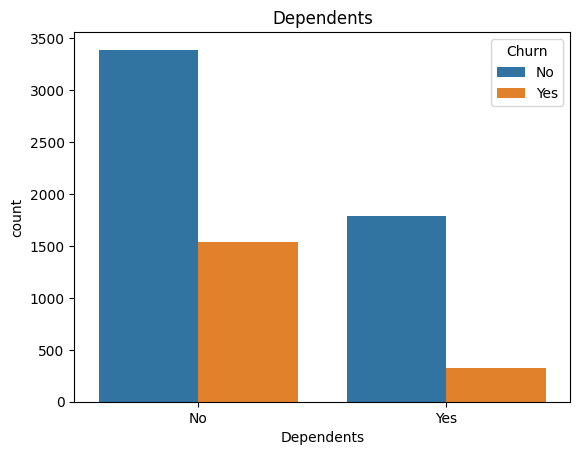

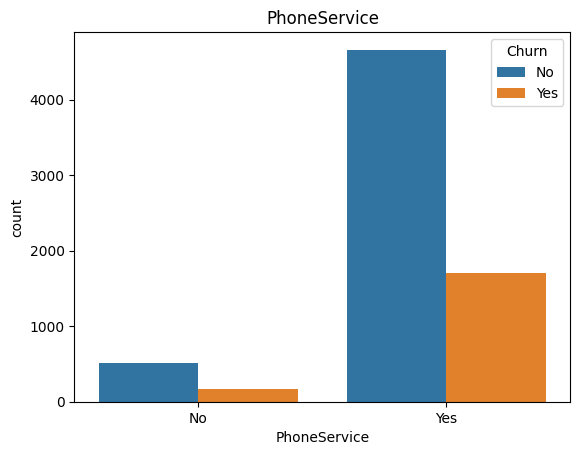

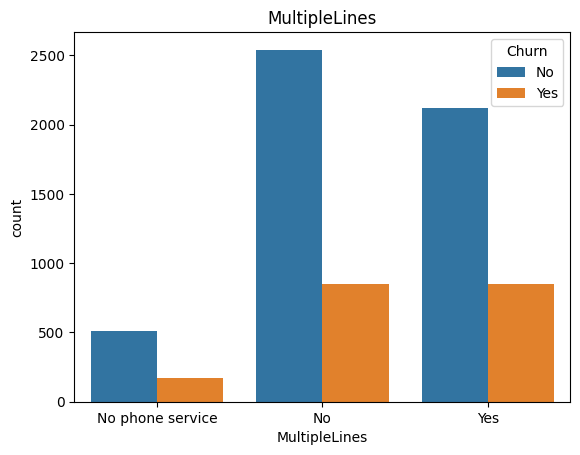

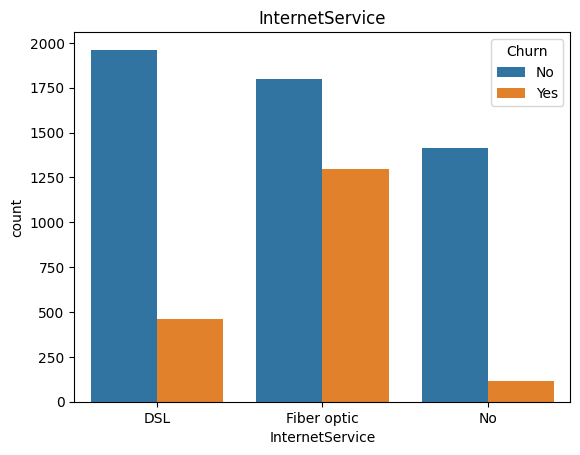

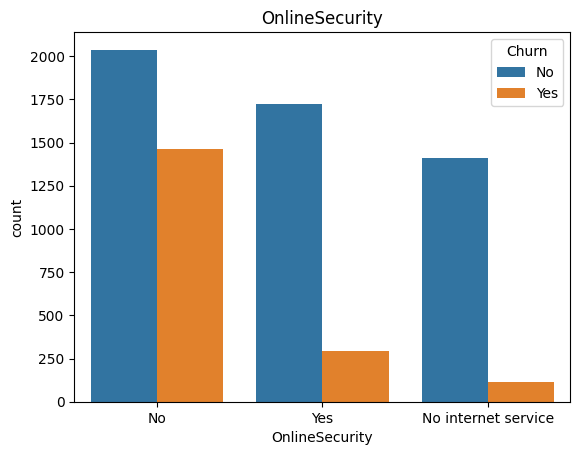

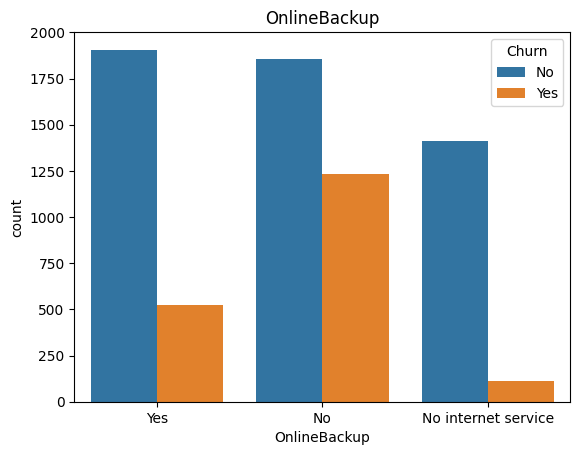

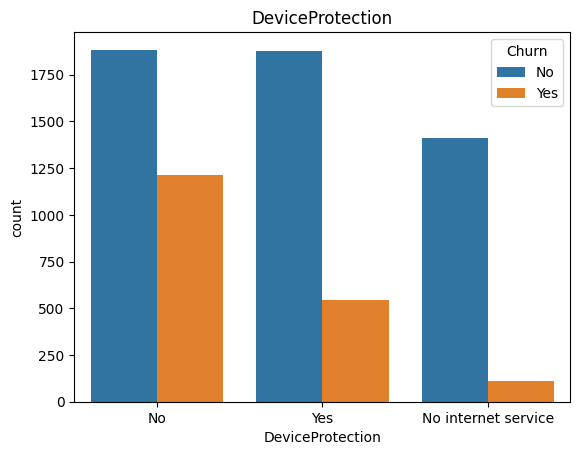

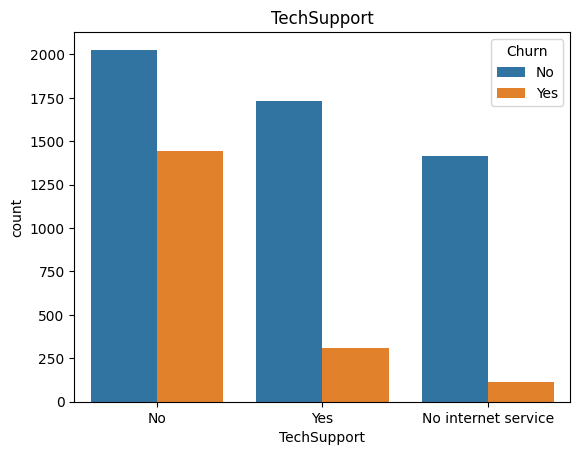

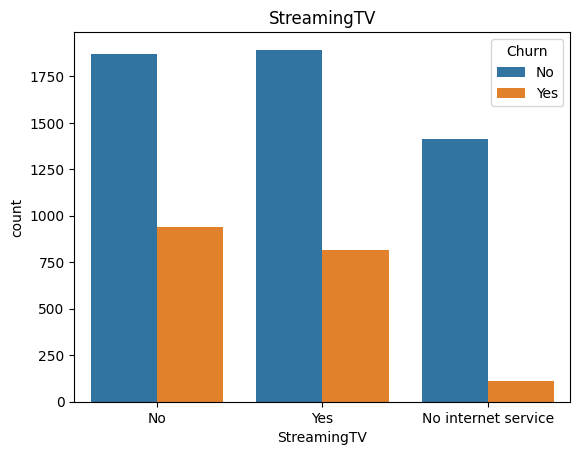

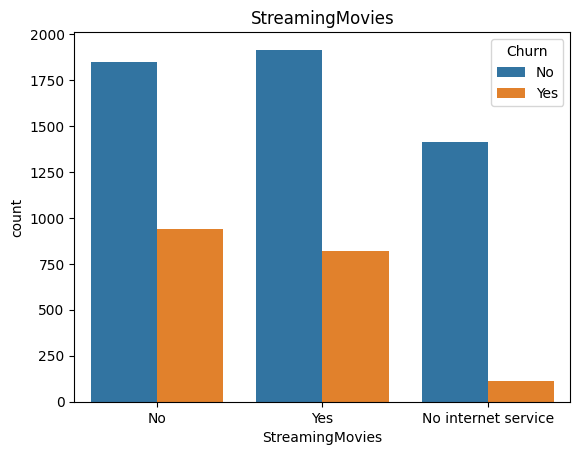

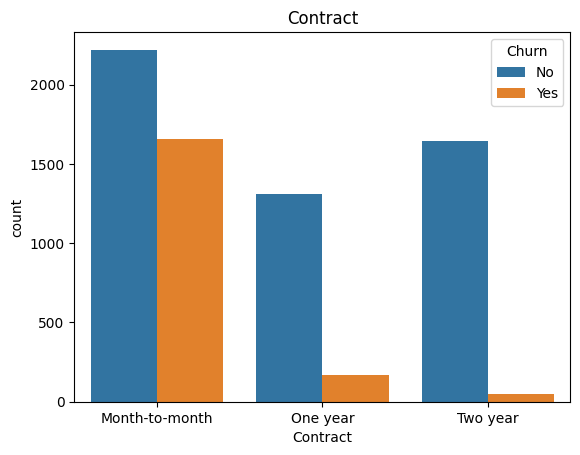

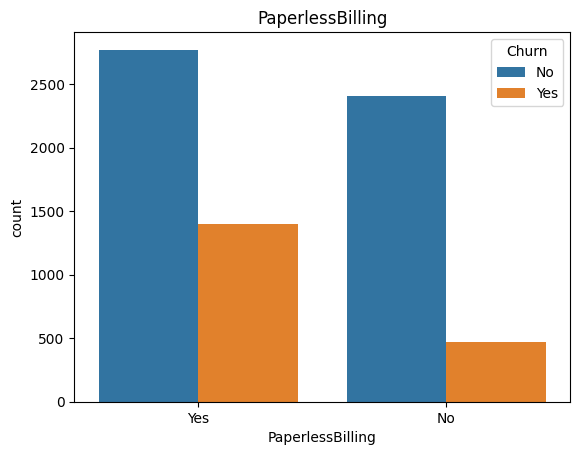

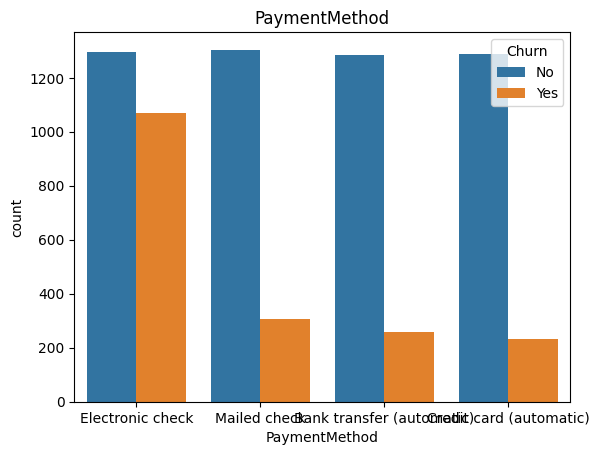

In [37]:
# for every feature plot the churn rate
for col in data.select_dtypes(include=['O']).columns:
    if col not in ['customerID', 'Churn']:
        sns.countplot(x=col, data=data,hue='Churn').set_title(col)
        plt.show()

In [38]:
'''We can see that there are 5174 customers who did not churn and 1869 
customers who churned and left the company. So, we can say that the dataset is imbalanced.'''

In [40]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data.drop('customerID', axis=1, inplace=True)

In [42]:
# Make dummy variables for all categorical variables
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

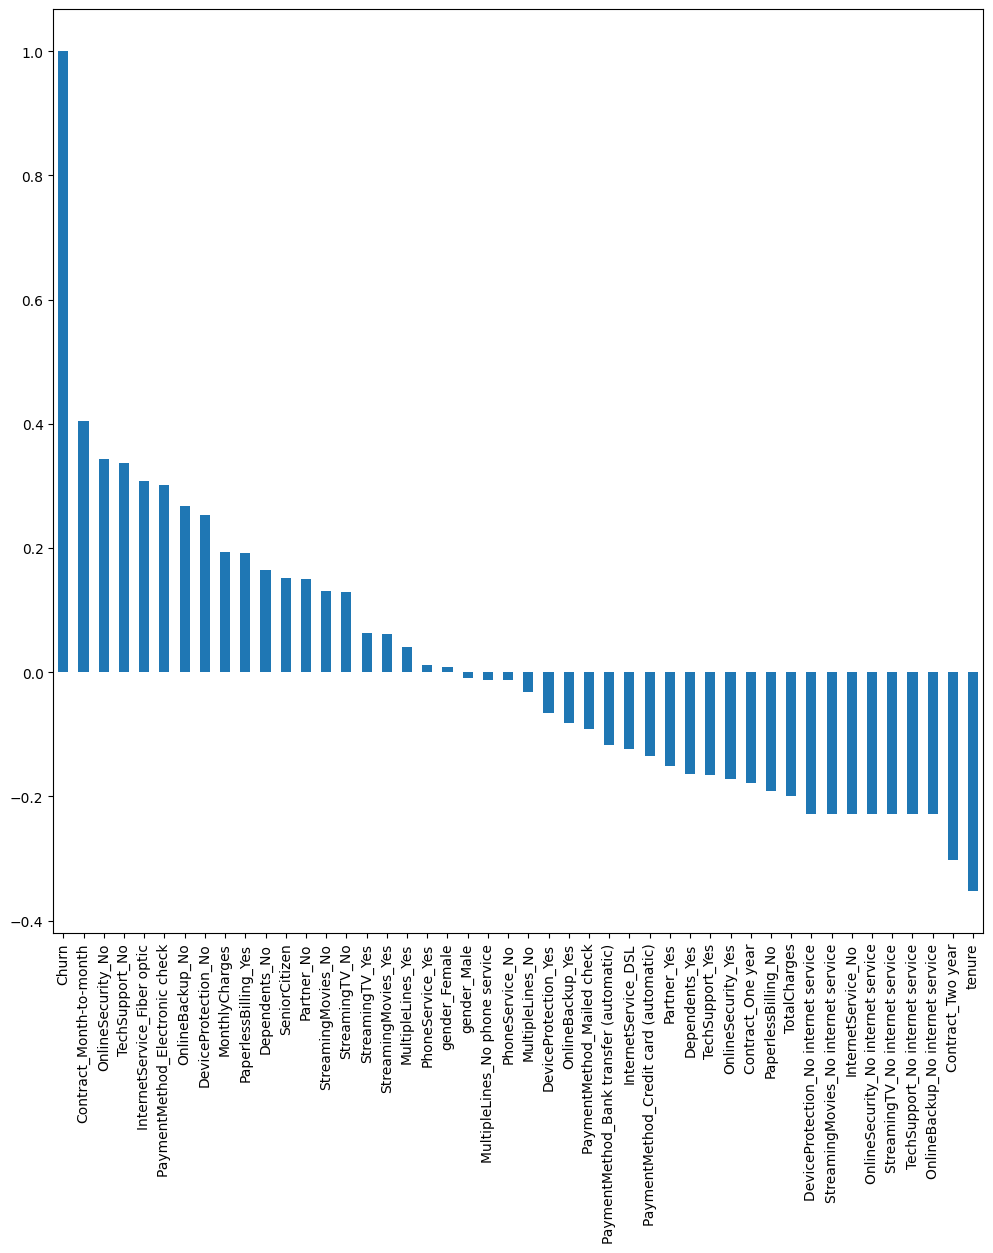

In [43]:
# Correlation plot
plt.figure(figsize=(12,12))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [52]:
data_dummies.corr()
plt.show()

In [54]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_dummies.astype(float)))
data_scaled.columns = data_dummies.columns
data_scaled.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
'''
Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables
'''
After going through the above EDA we will develop some predictive models and compare them.
We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

In [57]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target variable (y)
data_scaled = data_scaled.dropna()
X = data_scaled.drop('Churn', axis=1)
y = data_scaled['Churn']

# Split the data into training and testing sets
# You can adjust the test_size parameter based on the desired split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test for training and testing your machine learning model


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [63]:
# Logistic regression

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)
#T
logistic_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.80
Confusion Matrix:
 [[1381  168]
 [ 263  298]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [65]:
RandomForestClassifier
# Assuming X_train, X_test, y_train, y_test are your training and testing sets
# If not, replace these variables with your actual data.

# Create a Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the training set
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.78
Confusion Matrix:
 [[1380  169]
 [ 299  262]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      1549
         1.0       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [87]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
        .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
        .format(svm.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.79
[[1397  152]
 [ 292  269]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1549
         1.0       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [66]:
# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('Accuracy of AdaBoost classifier on training set: {:.2f}'
        .format(ada.score(X_train, y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'
        .format(ada.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

Accuracy of AdaBoost classifier on training set: 0.81
Accuracy of AdaBoost classifier on test set: 0.79
[[1384  165]
 [ 276  285]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.63      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [67]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(xgb.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy of XGBoost classifier on training set: 0.95
Accuracy of XGBoost classifier on test set: 0.77
[[1338  211]
 [ 274  287]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      1549
         1.0       0.58      0.51      0.54       561

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110



In [70]:
from sklearn.model_selection import GridSearchCV

In [86]:
# Create a Random Forest model
#rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
#print(f"Best Hyperparameters: {best_params}")
#print(f"Accuracy with Best Model: {accuracy:.2f}")
#print(confusion_matrix(y_test, y_pred_random_forest))
#print(classification_report(y_test, y_pred_random_forest))
#print('Best Hyperparamaeters:', CV_random_forest.best_params_)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(grid_search.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(grid_search.score(X_test, y_test)))

# Print confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy of Random Forest classifier on training set: 0.86
Accuracy of Random Forest classifier on test set: 0.80
Confusion Matrix:
 [[1410  139]
 [ 282  279]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1549
         1.0       0.67      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [76]:
# XGBoost
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [4,5,6,7,8],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2]
}
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_score_)
y_pred_xgb = CV_xgb.predict(X_test)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(CV_xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(CV_xgb.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.8015067475547852
Accuracy of XGBoost classifier on training set: 0.84
Accuracy of XGBoost classifier on test set: 0.80
[[1389  160]
 [ 269  292]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



<Axes: >

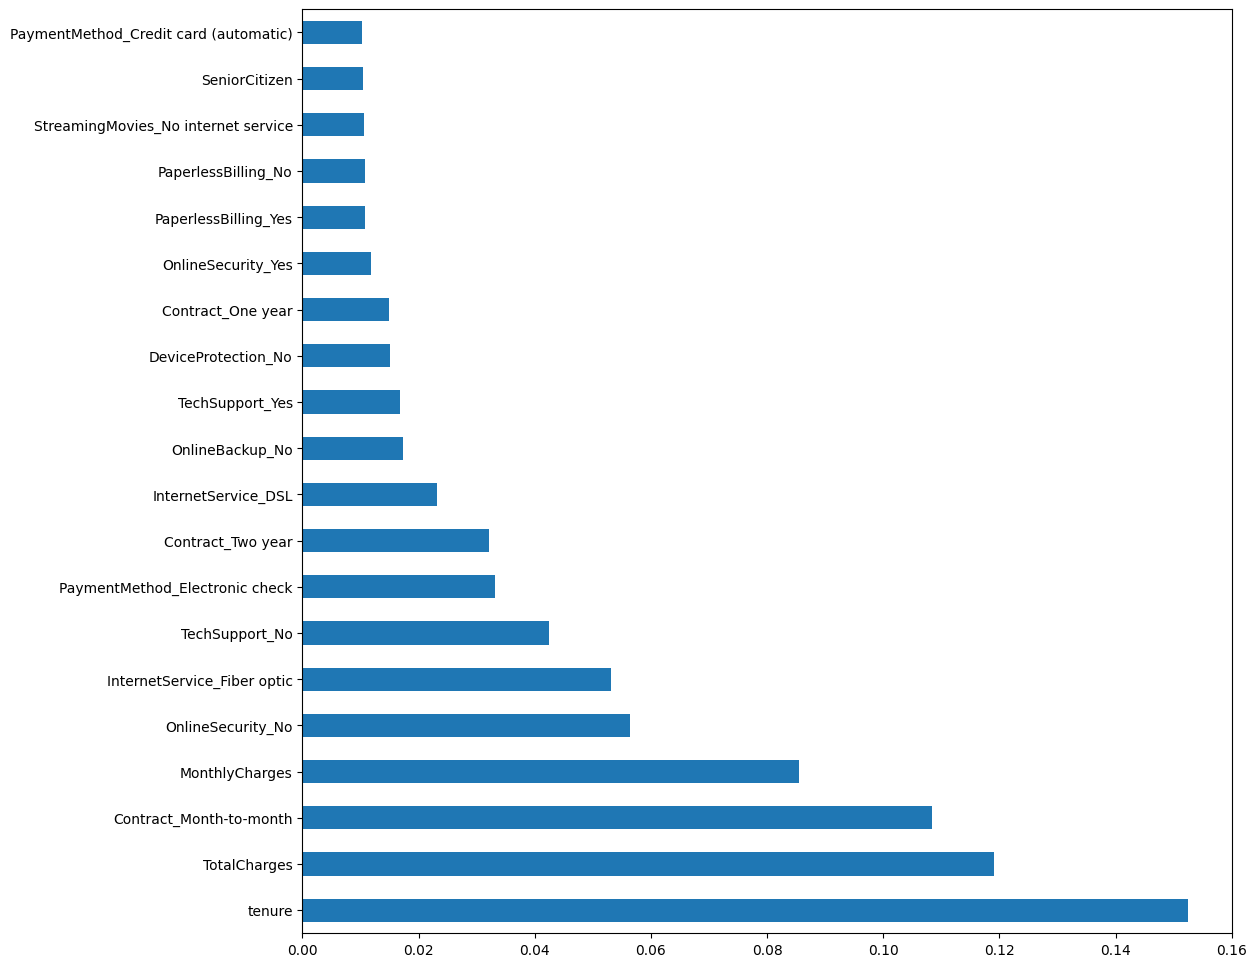

In [81]:
# Feature Importance
plt.figure(figsize=(12,12))
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')



In [90]:
# compare the models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost', 'XGBoost'],
    'Score': [logistic_model.score(X_test, y_test), grid_search.score(X_test, y_test), svm.score(X_test, y_test), ada.score(X_test, y_test), CV_xgb.score(X_test, y_test)],
    'Train Score': [logistic_model.score(X_train, y_train), grid_search.score(X_train, y_train), svm.score(X_train, y_train), ada.score(X_train, y_train), CV_xgb.score(X_train, y_train)]
    , 'Best Params': ['-', grid_search.best_params_, '-', '-', CV_xgb.best_params_]
    , 'Best Score': ['-', grid_search.best_score_, '-', '-', CV_xgb.best_score_]
    , 'Confusion Matrix': [confusion_matrix(y_test, y_pred), confusion_matrix(y_test, y_pred), confusion_matrix(y_test, y_pred_svm), confusion_matrix(y_test, y_pred_ada), confusion_matrix(y_test, y_pred_xgb)]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Train Score,Best Params,Best Score,Confusion Matrix
1,Random Forest,0.800474,0.858797,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.803537,"[[1410, 139], [282, 279]]"
4,XGBoost,0.796682,0.837261,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.801507,"[[1389, 160], [269, 292]]"
0,Logistic Regression,0.795735,0.803332,-,-,"[[1410, 139], [282, 279]]"
3,AdaBoost,0.790995,0.809224,-,-,"[[1384, 165], [276, 285]]"
2,SVM,0.789573,0.819992,-,-,"[[1397, 152], [292, 269]]"
